# Computational Linear Algebra: SPARSE MATRICES Homework 

## 0. Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, diags
import networkx as nx
from collections import deque

## 1. Introduction

##### Comparison of a structured and an unstructured sparse matrix

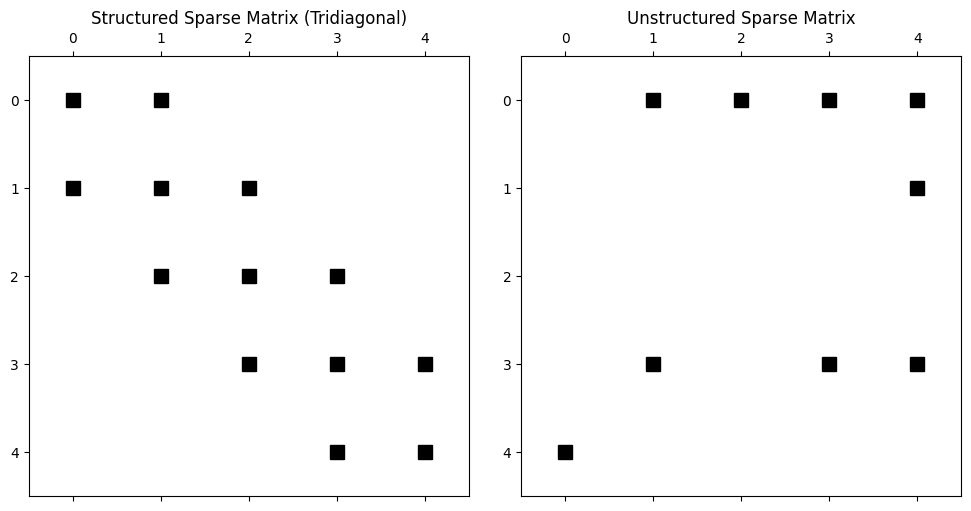

In [2]:
# Structured Sparse Matrix (Tridiagonal)
diagonals = [np.ones(5), np.ones(4), np.ones(4)]
A = diags(diagonals, [0, -1, 1], shape=(5, 5)).tocsr() # To Compressed Sparse Row

# Unstructured Sparse Matrix
B = csr_matrix(np.random.randint(0, 2, size=(5, 5)))

plt.figure(figsize=(10, 5))
plt.rcParams['axes.facecolor'] = 'white'

# Subplot 1 (Structured Sparse Matrix (Tridiagonal))
plt.subplot(1, 2, 1)
plt.spy(A, marker='s', color='black')  
plt.title("Structured Sparse Matrix (Tridiagonal)")

# Subplot 2 (Unstructured Sparse Matrix)
plt.subplot(1, 2, 2)
plt.spy(B, marker='s', color='black')  
plt.title("Unstructured Sparse Matrix")

plt.tight_layout()
plt.savefig("structuredVSunstructured.png", dpi=300) 
plt.show()

## 2. Graph Representations

### 2.1 Graphs and Adjacency Graphs

##### Representation of structured and unstructured sparse matrices with respective spy plots and graphs

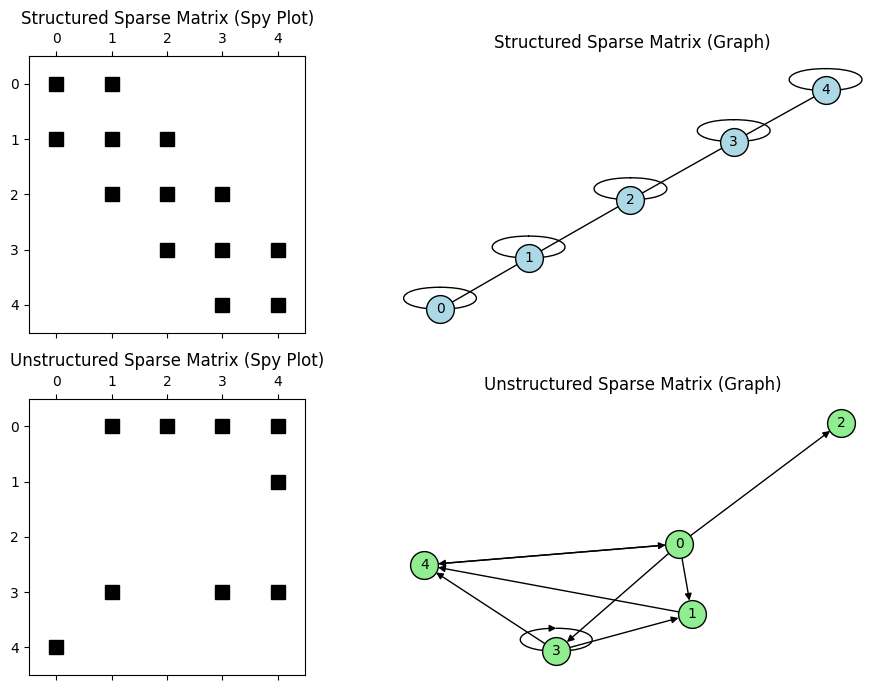

In [3]:
plt.figure(figsize=(10, 7)) 
plt.rcParams['axes.facecolor'] = 'white'

# Subplot 1 (Structured Matrix - Spy Plot)
plt.subplot(2, 2, 1)  # Use 2 rows, 2 columns
plt.spy(A, marker='s', color='black')
plt.title("Structured Sparse Matrix (Spy Plot)")

# Subplot 2 (Structured Matrix - Graph)
plt.subplot(2, 2, 2)
    # Create graph from unstructured matrix
rows, cols = A.nonzero()
edges = zip(rows.tolist(), cols.tolist())
G_structured = nx.Graph()
G_structured.add_nodes_from(range(A.shape[0]))  # Add nodes explicitly
G_structured.add_edges_from(edges)
    # Layout and visualization of the graph
pos = nx.spring_layout(G_structured)
nx.draw(G_structured, pos=pos, with_labels=True, node_size=400, node_color="lightblue", edgecolors="black", font_size=10)
plt.title("Structured Sparse Matrix (Graph)")

# Subplot 3 (Unstructured Matrix - Spy Plot)
plt.subplot(2, 2, 3)
plt.spy(B, marker='s', color='black')
plt.title("Unstructured Sparse Matrix (Spy Plot)")

# Subplot 4 (Unstructured Matrix - Graph)
plt.subplot(2, 2, 4)
    # Create graph from unstructured matrix
rows, cols = B.nonzero()
edges = zip(rows.tolist(), cols.tolist())
G_unstructured = nx.DiGraph()
G_unstructured.add_nodes_from(range(B.shape[0]))  # Add nodes explicitly
G_unstructured.add_edges_from(edges)
    # Layout and visualization of the graph
pos = nx.spring_layout(G_unstructured)
nx.draw(G_unstructured, pos=pos, with_labels=True, node_size=400, node_color="lightgreen", edgecolors="black", font_size=10)
plt.title("Unstructured Sparse Matrix (Graph)")

plt.tight_layout()
plt.savefig("structured_unstructured_comparison.png", dpi=300)
plt.show()

## 3. Permutations and Reorderings

### 3.1 Relations with the Adjacency Graph

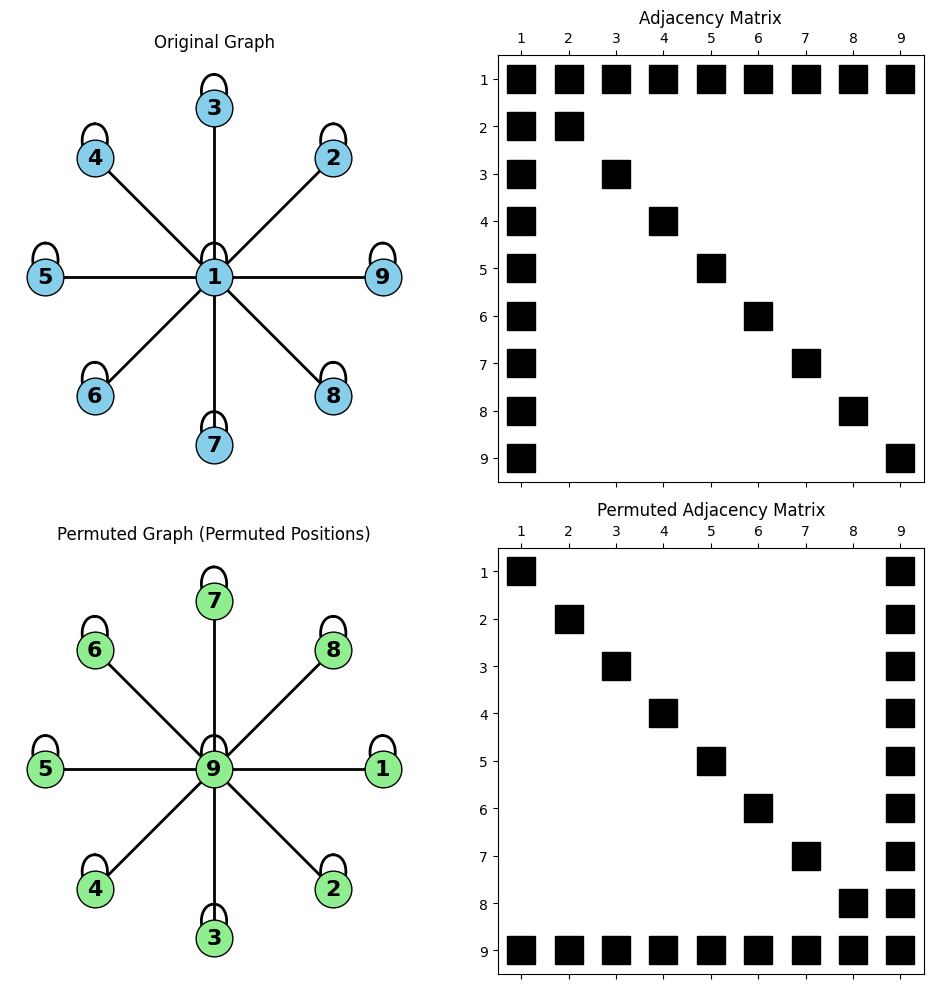

In [4]:
# Create the ORIGINAL graph
original_graph = nx.Graph()  # Create an empty NetworkX graph object
original_nodes = list(range(1, 10))  # Create a list of nodes from 1 to 9 (inclusive)
original_graph.add_nodes_from(original_nodes)  # Add the nodes to the graph

for node in original_nodes:  # Iterate through all nodes
    if node != 1:  # If the node is not node 1
        original_graph.add_edge(1, node)  # Add an edge between node 1 and the current node 
for node in original_nodes:
    original_graph.add_edge(node, node)  # Add a self-loop (edge to itself) for each node

# Calculate ORIGINAL positions
original_positions = nx.spring_layout(original_graph)  # Calculate node positions using the spring layout algorithm 
original_positions[1] = (0.5, 0.5)  # Manually set the position of node 1 to the center of the plot (0.5, 0.5)
for node in original_nodes:
    if node != 1:  
        angle = (node - 1) * 2 * np.pi / 8  # Calculate the angle for the node in a circular layout (8 nodes around the center)
        original_positions[node] = (0.5 + np.cos(angle) * 0.4, 0.5 + np.sin(angle) * 0.4)  # Calculate x and y coordinates for circular placement around node 1

# Create the PERMUTED graph
permuted_nodes = list(range(9, 0, -1)) # Application of the permutation pi = {9, 8, 7, 6, 5, 4, 3, 2, 1} (reverse order of nodes)
node_mapping = dict(zip(original_nodes, permuted_nodes))  # Create a dictionary mapping original nodes to permuted nodes
permuted_graph = nx.relabel_nodes(original_graph.copy(), node_mapping)  

# Create the NEW positions mapping
permuted_positions = {}  
for original_node, permuted_node in node_mapping.items():  # Iterate through the node mapping
    permuted_positions[permuted_node] = original_positions[original_node]  # Assign the original position to the corresponding permuted node

# Calculate ORIGINAL adjacency matrix
original_adjacency_matrix = nx.to_numpy_array(original_graph, nodelist=original_nodes)  


plt.figure(figsize=(10, 10))  

# Subplot 1 - Plot the ORIGINAL graph
plt.subplot(2, 2, 1)  
nx.draw_networkx_nodes(original_graph, original_positions, node_size=700, node_color="skyblue", edgecolors="black")  # Draw nodes in the original graph with skyblue color and black edges
nx.draw_networkx_edges(original_graph, original_positions, width=2)  # Draw edges in the original graph with a width of 2
nx.draw_networkx_labels(original_graph, original_positions, font_size=16, font_weight="bold") 
plt.title("Original Graph") 
plt.gca().set_aspect('equal')  
plt.axis('off')  

# Subplot 2 - Plot the ORIGINAL adjacency matrix
plt.subplot(2, 2, 2)  
inverted_adjacency_matrix = original_adjacency_matrix[::-1]  # Invert the rows of the adjacency matrix to match the node order in the graph
plt.spy(inverted_adjacency_matrix, marker='s', markersize=20, color='black')  # Plot the adjacency matrix using square markers 
plt.title("Adjacency Matrix")  # Set the title for this subplot
plt.xticks(np.arange(len(permuted_nodes)), permuted_nodes[::-1])  # Set x-axis labels (inverted order to match the matrix) with permuted node names
plt.yticks(np.arange(len(permuted_nodes)), permuted_nodes)  # Set y-axis labels with original node names
plt.gca().set_ylim([-0.5, len(permuted_nodes) - 0.5])  
plt.gca().set_xlim([-0.5, len(permuted_nodes) - 0.5])  

# Subplot 3 -  Plot the PERMUTED graph 
plt.subplot(2, 2, 3)  
nx.draw_networkx_nodes(permuted_graph, permuted_positions, node_size=700, node_color="lightgreen", edgecolors="black")  # Draw nodes in the permuted graph with lightgreen color and black edges
nx.draw_networkx_edges(permuted_graph, permuted_positions, width=2)  # Draw edges in the permuted graph
nx.draw_networkx_labels(permuted_graph, permuted_positions, font_size=16, font_weight="bold")  
plt.title("Permuted Graph (Permuted Positions)")  
plt.gca().set_aspect('equal') 
plt.axis('off')  

# Subplot 4 - Plot the PERMUTED adjacency matrix
plt.subplot(2, 2, 4)  
permuted_adjacency_matrix = nx.to_numpy_array(permuted_graph, nodelist=permuted_nodes)  # Convert the permuted graph to a NumPy adjacency matrix (based on permuted node order)
permuted_adjacency_matrix_transposed = permuted_adjacency_matrix.T  # Transpose the adjacency matrix (for better visualization)
permuted_adjacency_matrix_inverted = permuted_adjacency_matrix_transposed[::-1, ::-1]  # Invert both rows and columns of the transposed matrix
plt.spy(permuted_adjacency_matrix_inverted, marker='s', markersize=20, color='black')  # Plot the permuted adjacency matrix with square markers 
plt.title("Permuted Adjacency Matrix") 

# Configure Axes for the Adjacency Matrix Plot
plt.xticks(np.arange(len(permuted_nodes)), permuted_nodes[::-1])  
plt.yticks(np.arange(len(permuted_nodes)), permuted_nodes[::-1])  
plt.gca().set_ylim([len(permuted_nodes) - 0.5, -0.5])  
plt.gca().set_xlim([-0.5, len(permuted_nodes) - 0.5])  

# Finalize the plot
plt.tight_layout()  
plt.savefig("graphs_and_matrices_2x2.png", dpi=300)  
plt.show()  
plt.close()

### 3.2 Common Reorderings

#### 3.2.1 Level-set ordering

##### Breadth-First Search

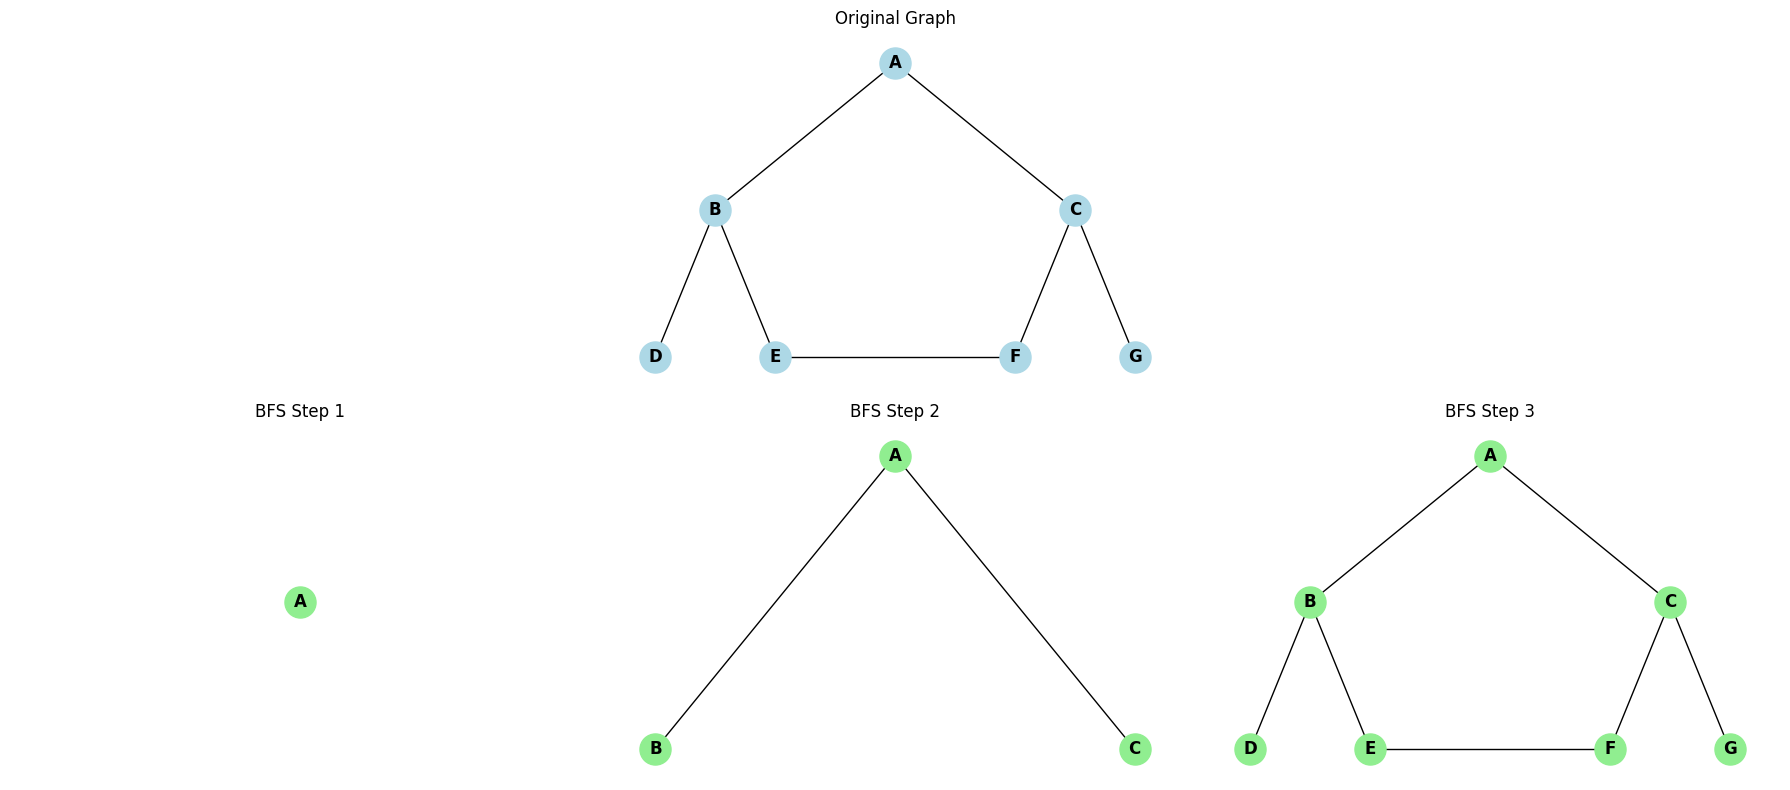

In [12]:
def bfs(graph, start_node):
    if start_node not in graph:  # Check if the starting node exists in the graph
        print(f"Error: Starting node '{start_node}' not found in the graph.")  # Print an error message if the start node is not found
        return None  # Return None to indicate an error

    G_original = nx.from_dict_of_lists(graph) # Create a networkx graph from the graph dictionary

    # Fixed node positions for visualization
    pos = { 
        'A': np.array([0.5, 0.8]),
        'B': np.array([0.2, 0.5]),
        'C': np.array([0.8, 0.5]),
        'D': np.array([0.1, 0.2]),
        'E': np.array([0.3, 0.2]),
        'F': np.array([0.7, 0.2]),
        'G': np.array([0.9, 0.2]),
    }

    s = deque([start_node])  # Initialize a deque for BFS, starting with the start node
    seen = 1  # Initialize a counter to track the order in which nodes are visited
    pi = {seen: start_node}  # Initialize a dictionary to map visit order to nodes 
    marked = {start_node}  # Initialize a set to keep track of visited/marked nodes
    bfs_steps = []  # Initialize a list to store the graph at each BFS step

    while s:  # While the queue is not empty
        s_new = deque()  # Initialize a new deque for the next level of BFS
        current_step_graph = nx.Graph()  # Create a new empty graph for the current BFS step
        current_step_graph.add_nodes_from(marked)  # Add the already marked nodes to the current step graph

        for node in marked: 
            if node in graph: 
                for neighbor in graph[node]:
                    if neighbor in marked:
                        current_step_graph.add_edge(node, neighbor) # Add the edge to the graph of the current step
        bfs_steps.append(current_step_graph)  # Append the current state of the graph to the list of steps

        for v in list(s):  # Iterate through the nodes in the current queue
            if v in graph: 
                for w in graph[v]:  # Iterate through the neighbors of the current node v
                    if w not in marked:  
                        s_new.append(w)  # Add the neighbor w to the new queue for the next level
                        marked.add(w)  # Mark the neighbor w as visited
                        seen += 1  # Increment the visit order counter
                        pi[seen] = w  # Map the visit order to the neighbor w in the pi dictionary
        s = s_new  # Update the queue for the next level of BFS

    num_steps = len(bfs_steps)  # Calculates the total number of BFS steps taken.

    fig, axes = plt.subplots(2, num_steps if num_steps > 0 else 1, figsize=(6 * (num_steps if num_steps > 0 else 1), 8))
    
    pos_dict = dict(pos) # Creates a dictionary pos_dict from the pos dictionary. This is used to maintain node positions during plotting.
    
    # Plot the Original Graph (center of the first row)
    if num_steps > 0: # Check if there are any BFS steps to be plotted
        original_graph_ax = axes[0, num_steps // 2] # Selects the central subplot in the first row to plot the original graph
        nx.draw(G_original, pos=pos_dict, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', ax=original_graph_ax) # Draws the original graph on the selected subplot with specified visual properties
        original_graph_ax.set_title("Original Graph") # Sets the title for the original graph subplot.
    
        # Hide the other axes in the first row
        for i in range(num_steps): # Iterates through all the subplots in the first row 
            if i != num_steps // 2: # Checks if the current subplot index is NOT the central one.
                axes[0, i].set_axis_off() # Turns off the axes (removes the spines, ticks, and labels) for the empty subplots in the first row, creating whitespace
    
    else: # This 'else' block handles the case where there are NO BFS steps (only the original graph)
        original_graph_ax = axes[0] # Selects the first (and only) subplot in the first row.
        nx.draw(G_original, pos=pos_dict, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', ax=original_graph_ax) # Draws the original graph on the subplot
        original_graph_ax.set_title("Original Graph") # Sets the title of the subplot.
    
    # Plot BFS Steps (second row)
    for i, graph_step in enumerate(bfs_steps): # Iterates through the list of BFS steps, using enumerate to get both the index (i) and the graph for each step (graph_step)
        ax = axes[1, i] if num_steps > 0 else axes[1] # Select the current axis to plot on. If there are multiple steps, selects the appropriate axis in the second row. If there is only one axis, selects that axis
        nx.draw(graph_step, pos=pos_dict, with_labels=True, node_color='lightgreen', node_size=500, font_size=12, font_weight='bold', ax=ax) # Draws the graph for the current BFS step on the corresponding subplot with specified visual properties
        ax.set_title(f"BFS Step {i+1}") # Sets the title for the current BFS step subplot.
    
    plt.tight_layout() # Adjusts subplot parameters to provide padding and prevent overlapping of titles/labels.
    plt.savefig("BFS.png", dpi=300) 
    plt.show() # Displays the plot in a new window.
    return pi, marked


# EXAMPLE
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': ['F'],
    'F': [],
    'G': ['C']
}

start_node = 'A'
pi, marked = bfs(graph, start_node)

#### 3.2.2 Greedy Algorithm for ISO

In [14]:
def adjacency_matrix_from_dict(graph):
    if not graph:  # Check if the input graph is empty (None or {})
        return None, None  # If the graph is empty, return None for both the matrix and the node-to-index mapping

    nodes = sorted(list(graph.keys()))  # Get a sorted list of the graph's nodes. Sorting ensures consistent matrix representation regardless of the dictionary's original order
    n = len(nodes)  # Get the number of nodes in the graph
    node_to_index = {node: i for i, node in enumerate(nodes)}  # Create a dictionary that maps each node to its corresponding index (0-based) in the matrix
    matrix = [[0] * n for _ in range(n)]  # Initialize the adjacency matrix as a list of lists, filled with zeros. This creates an n x n matrix

    for node, neighbors in graph.items():  
        i = node_to_index[node]  
        for neighbor in neighbors:  # Iterate through each 'neighbor' of the current 'node'
            if neighbor in node_to_index:  
                j = node_to_index[neighbor]  # Get the column index 'j' for the 'neighbor' from the node_to_index mapping
                matrix[i][j] = 1  # Set the element at row 'i' and column 'j' of the matrix to 1, indicating an edge between the 'node' and its 'neighbor'

    return matrix, node_to_index  

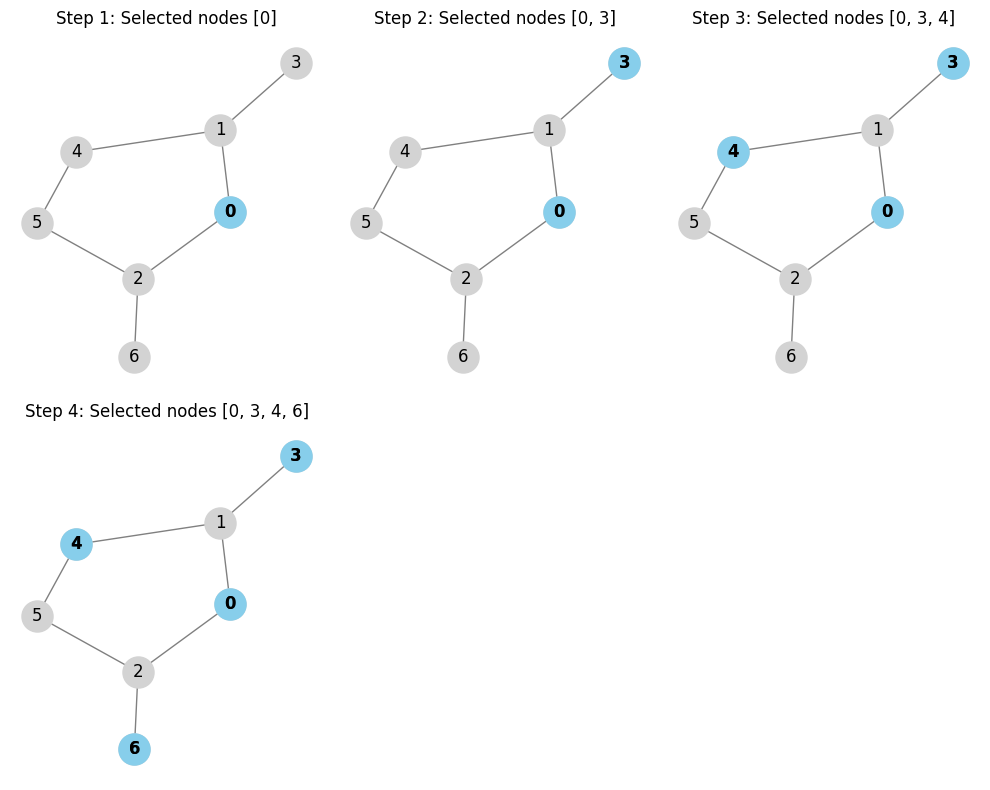

In [16]:
def greedy_iso(adjacency_matrix, pos):
    n = len(adjacency_matrix)  # Number of nodes in the graph
    S = []  # Initialize the independent set (empty at the beginning)
    marked = [False] * n  # List to keep track of visited/marked nodes (initially all False)
    original_graph = nx.from_numpy_array(np.array(adjacency_matrix)) # Create a networkx graph from the adjacency matrix
    subgraphs = [] # list of the subgraphs at each step

    for j in range(n):
        if not marked[j]:  # If the current node j is not marked (not yet in the independent set or a neighbor of one)
            S.append(j)  # Add node j to the independent set S
            marked[j] = True  # Mark node j as visited in the independent set

            subgraph = original_graph.subgraph(S).copy() # Create a subgraph with the nodes of S and copy it
            subgraphs.append(subgraph) 

            for i in range(n):  # Iterate through all other nodes to check for neighbors of j
                if adjacency_matrix[j][i] == 1:  
                    marked[i] = True  # Mark node i as visited

    return S, original_graph, subgraphs  

# EXAMPLE
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': ['F'],
    'F': [],
    'G': ['C']
}

matrix, node_to_index = adjacency_matrix_from_dict(graph)

# Check if the adjacency matrix is not empty
if matrix:
    adjacency_matrix = matrix # Assign the adjacency matrix for further processing
    G = nx.from_numpy_array(np.array(adjacency_matrix)) # Create a NetworkX graph object from the adjacency matrix 
    pos = nx.spring_layout(G, seed=42)  # Generate node positions for visualization using the spring layout algorithm 
    independent_set, original_graph, subgraphs = greedy_iso(adjacency_matrix, pos)
    plt.figure(figsize=(10, 4 * (len(subgraphs) // 3 + 1))) 
   
    for i, subgraph in enumerate(subgraphs):
        plt.subplot(len(subgraphs) // 3 + 1, 3, i + 1)
        plt.title(f"Step {i+1}: Selected nodes {list(subgraph.nodes)}")
        nx.draw(original_graph, pos, with_labels=True, node_color="lightgray", node_size=500, edge_color="gray")
        nx.draw(subgraph, pos, with_labels=True, node_color="skyblue", node_size=500, font_weight="bold")

    plt.tight_layout()
    plt.savefig("iso.png", dpi=300) 
    plt.show()

# If the adjacency matrix was empty 
else:
    print("Empty graph")  # Print a message indicating an empty graph

#### 3.2.3 Greedy Multicoloring Algorithm

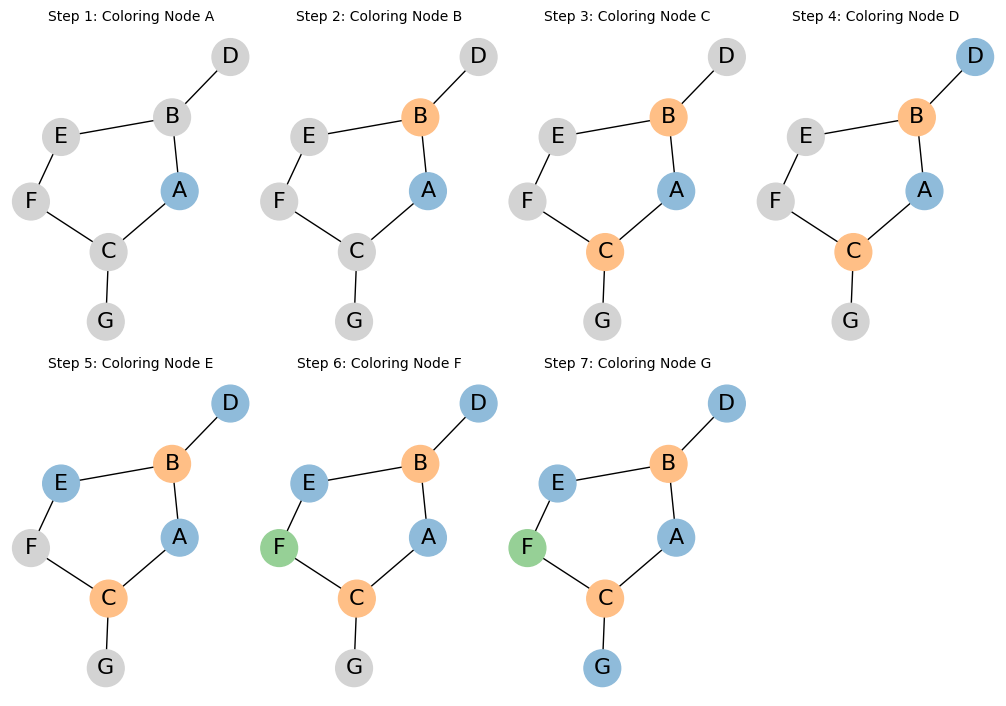

In [18]:
def greedy_multicoloring(graph, pos):
    if not graph:
        return None, None  # Handle empty graph case

    G = nx.Graph(graph) # Convert adjacency list to NetworkX graph object for easier manipulation
    n = len(G.nodes)  # Get the number of nodes in the graph
    color = {node: 0 for node in G.nodes} # Initialize a dictionary to store color assignments for each node

    node_colors = []

    light_colors = []
    for name, hex in mcolors.TABLEAU_COLORS.items():
        rgb = mcolors.hex2color(hex)
        light_rgb = [(c + 1) / 2 for c in rgb]  
        light_colors.append(mcolors.rgb2hex(light_rgb))

    # Calculate the number of rows and columns needed for the plot (dynamically)
    rows = min(4, (n + 3) // 4)  
    cols = min(4, n) if n < 4 else 4  

    fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
    axes = axes.flatten()

    for idx, i in enumerate(G.nodes):
        neighbor_colors = set() # Find the colors of neighboring nodes (already assigned colors)
        for j in G.neighbors(i):
            if color[j] != 0:
                neighbor_colors.add(color[j])

        k = 1 # Find the next available color that doesn't conflict with neighbors
        while k in neighbor_colors:
            k += 1
        color[i] = k
        
        node_colors.append(color.copy()) # Keep track of assigned colors for visualization at each step

        ax = axes[idx] if idx < rows * cols else None # Get the corresponding subplot for the current node

        if ax:  
            node_color_map = []
            for node in G.nodes():
                # Assign color based on the color dictionary and a light color scheme
                if node in color and color[node] != 0:
                    node_color_map.append(light_colors[(color[node]-1)%len(light_colors)])
                else:
                    node_color_map.append("lightgrey")  # Uncolored nodes 

            nx.draw(G, pos=pos, with_labels=True, node_color=node_color_map, 
                    node_size=700, font_size=16, ax=ax, font_color="black")
            ax.set_title(f"Step {idx+1}: Coloring Node {i}", fontsize=10)
            ax.set_axis_off()

        elif idx >= rows * cols:  
            print(f"Number of nodes exceeds the plot grid ({rows}x{cols}), only the first {rows * cols} have been plotted")
            break

    # Hide unused subplots 
    for i in range(idx + 1, rows * cols):
        if axes[i]:
            axes[i].axis('off')

    plt.tight_layout(pad=0.5) 
    plt.savefig("color.png", dpi=300) 
    plt.show()

# EXAMPLE 
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': ['F'],
    'F': [],
    'G': ['C']
}

G = nx.Graph(graph)
pos = nx.spring_layout(G, seed=42)
greedy_multicoloring(graph, pos)

## 4 Storage Schemes

### 4.1 Coordinate Format

In [7]:
def coordinate_format(matrix):
    # Find the positions of the non-zero elements
    non_zero_positions = matrix.nonzero()

    # Extract the non-zero values from the matrix
    AA = matrix[non_zero_positions]

    # Get the row and column indices of the non-zero values 
    JR = non_zero_positions[0] 
    JC = non_zero_positions[1] 

    return AA, JR, JC


def coo(matrix):
    coo = coo_matrix(matrix) # COO method
    AA = coo.data
    JR = coo.row
    JC = coo.col

    return AA, JR, JC

# EXAMPLE
matrix = np.array([[1, 0, 0, 2, 0],
                   [3, 4, 0, 5, 0],
                   [6, 0, 7, 8, 9],
                   [0, 0, 10, 11, 0],
                   [0, 0, 0, 0, 12]])

AA, JR, JC = coordinate_format(matrix)
print(f"COO format representation of the matrix:\n{matrix}")
print(f"Non-zero values (AA): {AA}")
print(f"Row indices (JR): {JR}")
print(f"Column indices (JC): {JC}")


AA, JR, JC = coo(matrix)
print(f"\nCOO format representation of the matrix:\n{matrix}")
print(f"Non-zero values (AA): {AA}")
print(f"Row indices (JR): {JR}")
print(f"Column indices (JC): {JC}")

COO format representation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (AA): [ 1  2  3  4  5  6  7  8  9 10 11 12]
Row indices (JR): [0 0 1 1 1 2 2 2 2 3 3 4]
Column indices (JC): [0 3 0 1 3 0 2 3 4 2 3 4]

COO format representation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (AA): [ 1  2  3  4  5  6  7  8  9 10 11 12]
Row indices (JR): [0 0 1 1 1 2 2 2 2 3 3 4]
Column indices (JC): [0 3 0 1 3 0 2 3 4 2 3 4]


### 4.2 Compressed Sparse Row (CSR) Format

In [10]:
def csr_manual(matrix):
    rows, cols = matrix.shape  # Get the number of rows and columns of the input matrix
    nnz = np.count_nonzero(matrix)  # Count the number of non-zero elements in the matrix

    AA = np.zeros(nnz)  # Initialize the AA array (values) with zeros. Its size is equal to the number of non-zero elements
    JA = np.zeros(nnz, dtype=int)  # Initialize the JA array (column indices) with zeros
    IA = np.zeros(rows + 1, dtype=int)  # Initialize the IA array (row pointers) with zeros

    index = 0  # Initialize an index to keep track of the current position in the AA and JA arrays.
    for i in range(rows):  
        IA[i] = index  # Set the i-th element of IA to the current index. This marks the beginning of the non-zero elements for row i in AA and JA.
        for j in range(cols): 
            if matrix[i, j] != 0:  
                AA[index] = matrix[i, j]  # If it's non-zero, store its value in AA at the current index
                JA[index] = j  # Store its column index in JA at the current index
                index += 1  # Increment the index to point to the next position in AA and JA
    IA[rows] = index  # After processing all rows, set the last element of IA to the final index value. This marks the end of the non-zero elements in AA and JA

    return AA, JA, IA  

def csr(matrix):
    csr = csr_matrix(matrix) # CSR method
    AA = csr.data
    JA = csr.indices
    IA = csr.indptr

    return AA, JA, IA


# EXAMPLE
matrix = np.array([[1, 0, 0, 2, 0],
              [3, 4, 0, 5, 0],
              [6, 0, 7, 8, 9],
              [0, 0, 10, 11, 0],
              [0, 0, 0, 0, 12]])

AA, JA, IA = csr_manual(matrix)
print(f"CSR representation of the matrix:\n{matrix}")
print(f"Non-zero values (AA): {AA}")
print(f"Column indexes (JA): {JA}")
print(f"Row indexes (IA): {IA}")

AA, JA, IA = csr(matrix)
print(f"\nCSR representation of the matrix:\n{matrix}")
print(f"Non-zero values (AA): {AA}")
print(f"Column indexes (JA): {JA}")
print(f"Row indexes (IA): {IA}")

CSR representation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (AA): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Column indexes (JA): [0 3 0 1 3 0 2 3 4 2 3 4]
Row indexes (IA): [ 0  2  5  9 11 12]

CSR rrepresentation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (AA): [ 1  2  3  4  5  6  7  8  9 10 11 12]
Column indexes (JA): [0 3 0 1 3 0 2 3 4 2 3 4]
Row indexes (IA): [ 0  2  5  9 11 12]


### 4.3 Compressed Sparse Column (CSC) Format

In [11]:
def csc_manually(matrix):
    rows, cols = matrix.shape  # Get the number of rows and columns of the input matrix
    num_non_zero_elements = np.count_nonzero(matrix)  # Count the number of non-zero elements in the matrix

    # Allocate arrays for the CSC data
    data = np.zeros(num_non_zero_elements)  # Initialize the 'data' array (values) with zeros
    row_indices = np.zeros(num_non_zero_elements, dtype=int)  # Initialize the 'row_indices' array with zeros
    column_pointers = np.zeros(cols + 1, dtype=int)  # Initialize the 'column_pointers' array with zeros

    current_index = 0  
    for col_index in range(cols):  
        column_pointers[col_index] = current_index  # Set the current element of 'column_pointers' to the current index. This marks the beginning of the non-zero elements for the current column
        for row_index in range(rows):  
            if matrix[row_index, col_index] != 0:  
                data[current_index] = matrix[row_index, col_index]  # If it's non-zero, store its value in 'data' at the current index
                row_indices[current_index] = row_index  # Store its row index in 'row_indices' at the current index
                current_index += 1  # Increment the index to point to the next position in 'data' and 'row_indices'
    column_pointers[cols] = current_index  # After processing all columns, set the last element of 'column_pointers' to the final index value. This marks the end of the non-zero elements

    return data, row_indices, column_pointers 

def csc(matrix):
    # Convert to CSC format using SciPy
    csc = csc_matrix(matrix)
    
    # Extract data from the CSC matrix
    data = csc.data
    row_indices = csc.indices
    column_pointers = csc.indptr
    
    return data, row_indices, column_pointers

# EXAMPLE
matrix = np.array([[1, 0, 0, 2, 0],
              [3, 4, 0, 5, 0],
              [6, 0, 7, 8, 9],
              [0, 0, 10, 11, 0],
              [0, 0, 0, 0, 12]])

# Convert to CSC format manually
data, row_indices, column_pointers = csc_manually(matrix)
print(f"CSC representation of the matrix:\n{matrix}")
print(f"Non-zero values (data): {data}")
print(f"Row indices (row_indices): {row_indices}")
print(f"Column pointers (column_pointers): {column_pointers}")

# Convert to CSC format using SciPy
data, row_indices, column_pointers = csc(matrix)
print(f"\nCSC representation of the matrix:\n{matrix}")
print(f"Non-zero values (data): {data}")
print(f"Row indices (row_indices): {row_indices}")
print(f"Column pointers (column_pointers): {column_pointers}")

CSC representation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (data): [ 1.  3.  6.  4.  7. 10.  2.  5.  8. 11.  9. 12.]
Row indices (row_indices): [0 1 2 1 2 3 0 1 2 3 2 4]
Column pointers (column_pointers): [ 0  3  4  6 10 12]

CSC representation of the matrix:
[[ 1  0  0  2  0]
 [ 3  4  0  5  0]
 [ 6  0  7  8  9]
 [ 0  0 10 11  0]
 [ 0  0  0  0 12]]
Non-zero values (data): [ 1  3  6  4  7 10  2  5  8 11  9 12]
Row indices (row_indices): [0 1 2 1 2 3 0 1 2 3 2 4]
Column pointers (column_pointers): [ 0  3  4  6 10 12]
